<a href="https://colab.research.google.com/github/chandini2595/CMPE255_Assignment3/blob/main/Pycaret_TimeSeries_Forecasting_Without_Exogenous_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [3]:
def what_is_installed():
    from pycaret import show_versions
    show_versions()

try:
    what_is_installed()
except ModuleNotFoundError:
    !pip install pycaret
    what_is_installed()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [9]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [16]:
data=get_data('pycaret_downloads', verbose=False)

<Axes: >

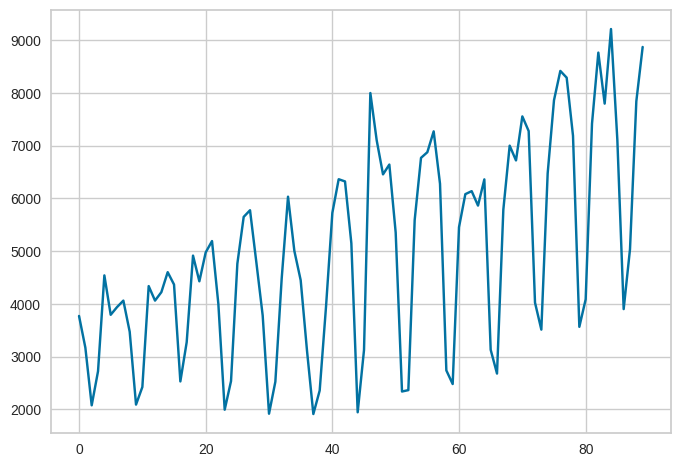

In [17]:
data['Total'].plot()

In [18]:
data.dtypes

,0
Date,object
Total,int64


In [19]:
import pandas as pd
data['Date'] = pd.to_datetime(data['Date'])


In [20]:
data.set_index('Date', drop=True,inplace=True)

<Axes: xlabel='Date'>

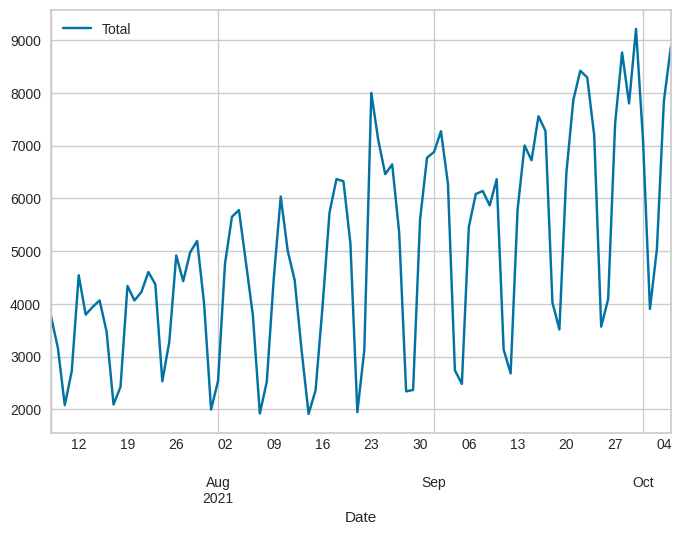

In [21]:
data.plot()

In [22]:
from pycaret.utils import version
version()

'3.3.2'

In [23]:
from pycaret.time_series import *
s=setup(data,fold=3,fh=12)

,Description,Value
0,session_id,4240
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(78, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [31]:
from pycaret.time_series import TSForecastingExperiment
s1=TSForecastingExperiment()

s2=setup(data,fold=3,fh=12)

,Description,Value
0,session_id,6926
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(78, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [32]:
type(s2)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [33]:
plot_model()

In [34]:
plot_model(plot='train_test_split')

In [35]:
plot_model(plot='cv')

In [36]:
plot_model(plot='acf')

In [37]:
plot_model(plot='pacf')

In [38]:
plot_model(plot='diagnostics')

In [39]:
best=compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,1.2749,1.1369,732.7092,894.2025,0.1550,0.1516,0.7334,0.1100
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.3460,1.2833,737.3306,934.8335,0.1430,0.1419,0.7346,0.6500
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.3716,1.3094,740.7690,924.8984,0.1327,0.1402,0.7345,0.6300
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9459,964.8748,0.1413,0.1466,0.7146,0.4333
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.3933
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.4000
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.4033
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.5833
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.4367,1.3217,782.2473,954.0348,0.1489,0.1500,0.7212,0.7733
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,1.4652,1.3355,796.2837,960.2113,0.1510,0.1533,0.7184,0.7767


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [40]:
best

ThetaForecaster(sp=7)

In [42]:
predict_model(best,fh=24)

,y_pred
2021-09-24,7111.4964
2021-09-25,3578.8096
2021-09-26,4123.7043
2021-09-27,7779.4459
2021-09-28,8493.7955
2021-09-29,8468.0194
2021-09-30,8467.1125
2021-10-01,7243.3989
2021-10-02,3645.0132
2021-10-03,4199.7866


In [43]:
final_best=finalize_model(best)

In [44]:
predict_model(final_best,fh=24)

,y_pred
2021-10-06,8969.4865
2021-10-07,9062.5373
2021-10-08,7681.8248
2021-10-09,3884.6712
2021-10-10,4463.8040
2021-10-11,8384.5546
2021-10-12,9199.1432
2021-10-13,9150.0046
2021-10-14,9244.4052
2021-10-15,7835.5437


In [45]:
plot_model(best,plot='forecast')

In [46]:
plot_model(best,plot='forecast',data_kwargs={'fh':36})

In [47]:
plot_model(best,plot='insample')

In [49]:
arima=create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,2.5825,2.8398,1181.7587,1579.3725,0.2065,0.2419,0.3673
1,2021-08-30,0.7835,0.6025,505.7363,583.4328,0.0913,0.0947,0.8690
2,2021-09-11,1.4576,1.2129,904.2588,1104.9126,0.1336,0.1465,0.6375
Mean,NaT,1.6079,1.5517,863.9179,1089.2393,0.1438,0.1610,0.6246
SD,NaT,0.7421,0.9443,277.4552,406.7417,0.0476,0.0609,0.2050


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
tuned_arima=tune_model(arima)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,2.2601,2.1837,1034.2402,1214.5026,0.2872,0.2452,0.6258
1,2021-08-30,1.4139,1.2593,912.5673,1219.3958,0.2083,0.1740,0.4277
2,2021-09-11,1.3152,1.2212,815.8934,1112.4398,0.1231,0.1323,0.6326
Mean,NaT,1.6631,1.5547,920.9003,1182.1128,0.2062,0.1838,0.5620
SD,NaT,0.4241,0.4450,89.3342,49.3067,0.0670,0.0466,0.0950


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.7s finished


In [53]:
blender=blend_models([arima,tuned_arima])

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,2.5825,2.8398,1181.7587,1579.3725,0.2065,0.2419,0.3673
1,2021-08-30,0.7835,0.6025,505.7363,583.4328,0.0913,0.0947,0.8690
2,2021-09-11,1.4576,1.2129,904.2588,1104.9126,0.1336,0.1465,0.6375
Mean,NaT,1.6079,1.5517,863.9179,1089.2393,0.1438,0.1610,0.6246
SD,NaT,0.7421,0.9443,277.4552,406.7417,0.0476,0.0609,0.2050


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [54]:
save_model(best,'my_best_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ThetaForecaster(sp=7))]))]),
 'my_best_model.pkl')

In [55]:
l=load_model('my_best_model')

Transformation Pipeline and Model Successfully Loaded


In [56]:
l

ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                ThetaForecaster(sp=7))]))])